# Integrated Project


## Project description
    
    We work for the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. You need to identify patterns that determine whether a game succeeds or not. This will allow you to spot potential big winners and plan advertising campaigns.
    
    In front of you is data going back to 2016. Let’s imagine that it’s December 2016 and you’re planning a campaign for 2017.
    
    (The important thing is to get experience working with data. It doesn't really matter whether you're forecasting 2017 sales based on data from 2016 or 2027 sales based on data from 2026.)
    
    The dataset contains the abbreviation ESRB. The Entertainment Software Rating Board evaluates a game's content and assigns an age rating such as Teen or Mature.

    File path:  /datasets/games.csv

### Project plan
1. [Prepare the Data](#introduction)
2. [Analyze Data](#introduction1)
3. [Statistical Tests](#introduction2)
4. [General conclusion](#introduction3)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
%matplotlib inline



In [3]:
df = pd.read_csv('/datasets/games.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
print (df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


We see that column 'Year_of_Release' with float64, so we change it for int. And we need to check 'Name', 'Year_of_Release', 'Critic_Score', 'User_Score', 'Rating' for a null objects.               

## Prepare the Data <a name="introduction"></a>

In [5]:
df.columns = df.columns.str.lower()

In [6]:
df.isnull().sum()/df.shape[0]

name               0.000120
platform           0.000000
year_of_release    0.016093
genre              0.000120
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513192
user_score         0.400897
rating             0.404786
dtype: float64

There are a few null values in "name" and "year_of_release" columns, so its simply to drop them.

In [7]:
df.dropna(subset=["year_of_release", 'name'], inplace=True)
df["year_of_release"] = df["year_of_release"].astype(int)

In [8]:
df.user_score.value_counts()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
1.1       2
0.9       2
1.3       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

In [9]:
df['user_score'] = pd.to_numeric(df['user_score'].replace('tbd', np.nan ))

There are a lot of 'tbd' values in "user_score" column, that mean - to be determined. I replaced all 'tbd in this column with 'null values and change this column to numeric.

In [10]:
df.critic_score.value_counts()

70.0    252
71.0    248
75.0    240
80.0    235
73.0    234
       ... 
29.0      3
20.0      3
21.0      1
13.0      1
17.0      1
Name: critic_score, Length: 81, dtype: int64

In [11]:
df['user_score'] = pd.to_numeric(df['user_score'])


I changed this column to numeric.

In [12]:
df.rating.value_counts()
df['rating'] = df['rating'].fillna('undefined')

I left all null values of 'rating' column and named they by 'undefined'. There are not disturb for work with data.

In [13]:
df['total_sales']=df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales']


First we prepared data:

    - replaced the column names (make them lowercase).
    - filled null values;
    - replaced the real data type with an integer;
    - categorixed data.

## Analyze Data <a name="introduction1"></a>

First, I will plot number of games released each year to get a sense of how far back we should be looking. There are relatively few games released prior to 2000, with a peak around 2008.

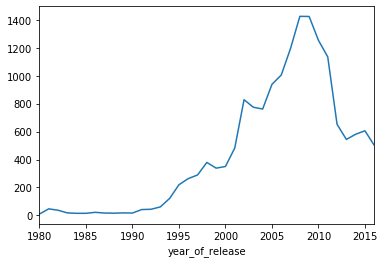

In [14]:
df.groupby('year_of_release').name.count().plot()
plt.show()

In [15]:
platform_df = df.groupby(['year_of_release','platform']).total_sales.sum().unstack(1)
print(platform_df.head())

platform          2600  3DO  3DS  DC  DS  GB  GBA  GC  GEN  GG  ...  SAT  SCD  \
year_of_release                                                 ...             
1980             11.38  NaN  NaN NaN NaN NaN  NaN NaN  NaN NaN  ...  NaN  NaN   
1981             35.68  NaN  NaN NaN NaN NaN  NaN NaN  NaN NaN  ...  NaN  NaN   
1982             28.88  NaN  NaN NaN NaN NaN  NaN NaN  NaN NaN  ...  NaN  NaN   
1983              5.84  NaN  NaN NaN NaN NaN  NaN NaN  NaN NaN  ...  NaN  NaN   
1984              0.27  NaN  NaN NaN NaN NaN  NaN NaN  NaN NaN  ...  NaN  NaN   

platform         SNES  TG16  WS  Wii  WiiU  X360  XB  XOne  
year_of_release                                             
1980              NaN   NaN NaN  NaN   NaN   NaN NaN   NaN  
1981              NaN   NaN NaN  NaN   NaN   NaN NaN   NaN  
1982              NaN   NaN NaN  NaN   NaN   NaN NaN   NaN  
1983              NaN   NaN NaN  NaN   NaN   NaN NaN   NaN  
1984              NaN   NaN NaN  NaN   NaN   NaN NaN   NaN  

[5 r

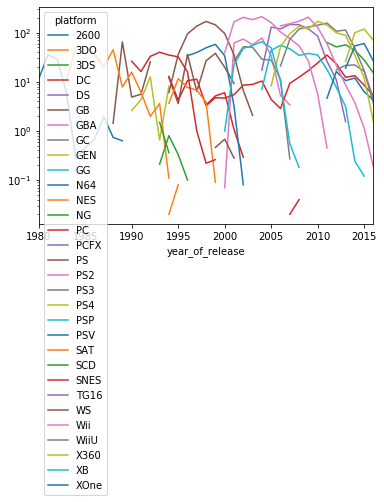

In [16]:
platform_df.plot()
plt.yscale('log')

plt.show()

Thare are too many platforms to plot at once, let's instead look at the top 10:

In [17]:
top_platforms = platform_df.sum().sort_values().index[-10:]

In [18]:
top_platforms

Index(['3DS', 'PSP', 'GBA', 'PS4', 'PS', 'DS', 'Wii', 'PS3', 'X360', 'PS2'], dtype='object', name='platform')

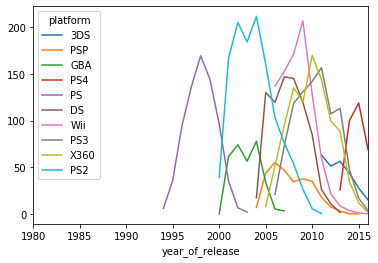

In [19]:
platform_df[top_platforms].plot()
plt.show()

It show us, how long are platforms active for:

In [20]:
(platform_df[top_platforms].notnull().sum())

platform
3DS      6
PSP     12
GBA      8
PS4      4
PS      10
DS      11
Wii     11
PS3     11
X360    12
PS2     12
dtype: int64

It seems are active fo around 11-12 years, but for future prediction we will used platforms that was actualy last 3 years.  For example, you'll get X360, which was an absolute blast in 2010, but "now" in 2016 it doesn't matter at all, because there is a never version of this console (Xbox One) and the games for 360 almost non-existent. We will exlude data before 2016 - 3 = 2013

In [21]:
df = df[df.year_of_release>=2010]

What are the top platforms? Are they growing/shrinking in sale?

In [22]:
platform_df = df.groupby(['year_of_release','platform']).total_sales.sum().unstack(1)
print (platform_df)

platform           3DS     DS     PC   PS2     PS3     PS4    PSP    PSV  \
year_of_release                                                            
2010               NaN  85.02  24.28  5.64  142.17     NaN  35.04    NaN   
2011             63.20  26.18  35.03  0.45  156.78     NaN  17.82   4.63   
2012             51.36  11.01  23.22   NaN  107.36     NaN   7.69  16.19   
2013             56.57   1.54  12.38   NaN  113.25   25.99   3.14  10.59   
2014             43.76    NaN  13.28   NaN   47.76  100.00   0.24  11.90   
2015             27.78    NaN   8.52   NaN   16.82  118.90   0.12   6.25   
2016             15.14    NaN   5.25   NaN    3.60   69.25    NaN   4.25   

platform            Wii   WiiU    X360   XOne  
year_of_release                                
2010             127.95    NaN  170.03    NaN  
2011              59.65    NaN  143.84    NaN  
2012              21.71  17.56   99.74    NaN  
2013               8.59  21.65   88.58  18.96  
2014               3.75  22

This table show us that:

    - Platforms ( 3DS, PC, PS3, PSV, Wii, WiiU, XBOX360) are shrinking in sales for the past few years.
    - PS4 and XOne are shrinking in sales last year.
    - PS4 is the top sales platform in 2016.
    - Platforms ( 3DS, PC, PS3, PS4, PSV, Wii, WiiU, XBOX360, XOne) will be sale in 2017.

21.82

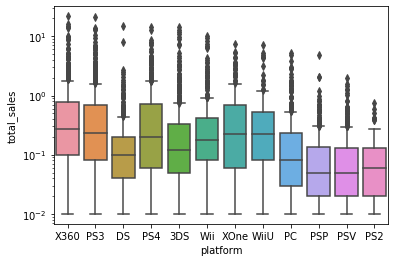

In [23]:
sns.boxplot(data=df, x='platform', y='total_sales')
plt.yscale('log')

df.total_sales.max()

                     year_of_release                                         \
                               count         mean       std     min     25%   
platform total_sales                                                          
3DS      0.01                   29.0  2013.793103  1.611993  2011.0  2013.0   
         0.02                   25.0  2013.280000  1.620699  2011.0  2012.0   
         0.03                   41.0  2014.000000  1.466288  2011.0  2013.0   
         0.04                   25.0  2013.680000  1.930458  2011.0  2012.0   
         0.05                   12.0  2013.250000  1.484771  2011.0  2012.0   
...                              ...          ...       ...     ...     ...   
XOne     4.22                    1.0  2015.000000       NaN  2015.0  2015.0   
         4.49                    1.0  2015.000000       NaN  2015.0  2015.0   
         5.26                    1.0  2014.000000       NaN  2014.0  2014.0   
         5.47                    1.0  2014.000000   

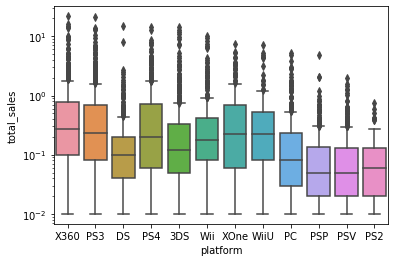

In [24]:
sns.boxplot(data=df, x='platform', y='total_sales')
plt.yscale('log')
print(df.groupby(['platform','total_sales']).describe())


This graphs show us:
    - The best saled game was for X360 - 21.8 milion.
    - The least sales for the PS2.
    - X360, PS3, PS4, XOne and WiiU have equal medium sales.

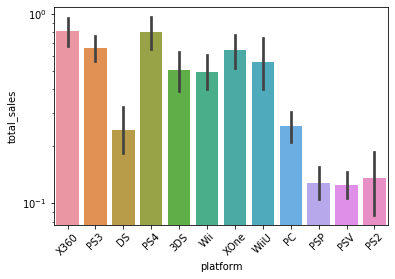

In [25]:
sns.barplot(data=df, x ='platform', y='total_sales' )
plt.xticks(rotation=45)
plt.yscale('log')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

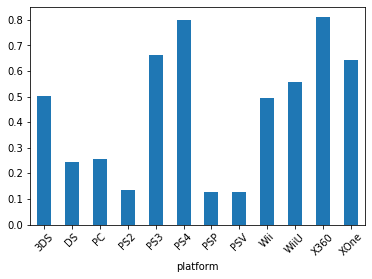

In [26]:
df.groupby(['platform']).total_sales.mean().plot(kind='bar')
plt.xticks(rotation=45)

- Most sales platforms are of Wii, X360, PS3, XOne and PS4 

##### Using PS4, we are going to look at the correlation between sales and reviews.

Text(0, 0.5, 'total_sales')

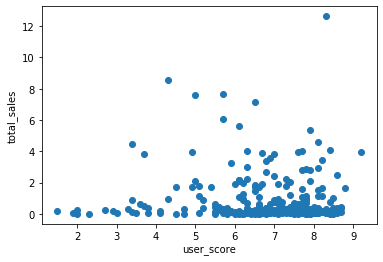

In [27]:
plt.scatter(df[df.platform=='PS4']['user_score'], df[df.platform=='PS4']['total_sales'])
plt.xlabel('user_score')
plt.ylabel('total_sales')


Text(0, 0.5, 'total_sales')

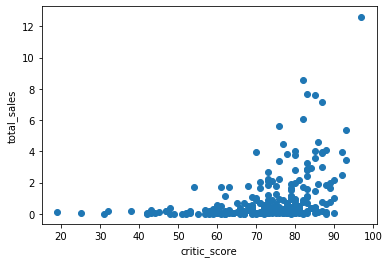

In [28]:
plt.scatter(df[df.platform=='PS4']['critic_score'], df[df.platform=='PS4']['total_sales'])
plt.xlabel('critic_score')
plt.ylabel('total_sales')

In [29]:
df[df.platform=='PS4'].corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.248961,-0.208306,-0.060993,-0.234796,-0.021142,0.152447,-0.235032
na_sales,-0.248961,1.000000,0.785362,0.472981,0.944259,0.415008,-0.020933,0.928160
eu_sales,-0.208306,0.785362,1.000000,0.464563,0.944698,0.346720,-0.048925,0.958157
jp_sales,-0.060993,0.472981,0.464563,1.000000,0.496467,0.322358,0.171332,0.527129
other_sales,-0.234796,0.944259,0.944698,0.496467,1.000000,0.409191,-0.035639,0.998051
critic_score,-0.021142,0.415008,0.346720,0.322358,0.409191,1.000000,0.557654,0.406568
user_score,0.152447,-0.020933,-0.048925,0.171332,-0.035639,0.557654,1.000000,-0.031957
total_sales,-0.235032,0.928160,0.958157,0.527129,0.998051,0.406568,-0.031957,1.000000


The correlation matrix (Pearson's correlation) show that for total sales, this is mildly (linearly) correlated with critic score (0.40) and not correlated with user score (-0.03).  So critic scores may slighly increase sales of a game, but user scores have no impact.  Part of the reason could be people have already bought the game and don't know if they like it or not until after they play it.

In [30]:
game_df = df.groupby(['name']).filter(lambda x: x['platform'].count() >= 2.).groupby(['name', 'platform']).total_sales.sum().unstack(1)
game_df

platform,3DS,DS,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
name,,,,,,,,,,,,
Frozen: Olaf's Quest,0.59,0.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010 FIFA World Cup South Africa,NaN,NaN,NaN,NaN,1.23,NaN,0.46,NaN,0.43,NaN,0.85,NaN
2014 FIFA World Cup Brazil,NaN,NaN,NaN,NaN,0.61,NaN,NaN,NaN,NaN,NaN,0.43,NaN
3rd Super Robot Wars Z Jigoku Hen,NaN,NaN,NaN,NaN,0.23,NaN,NaN,0.19,NaN,NaN,NaN,NaN
3rd Super Robot Wars Z: Tengoku-Hen,NaN,NaN,NaN,NaN,0.15,NaN,NaN,0.19,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
de Blob 2,NaN,0.11,NaN,NaN,0.21,NaN,NaN,NaN,0.19,NaN,0.15,NaN
iCarly 2: iJoin The Click!,NaN,0.27,NaN,NaN,NaN,NaN,NaN,NaN,0.10,NaN,NaN,NaN
nail'd,NaN,NaN,NaN,NaN,0.12,NaN,NaN,NaN,NaN,NaN,0.11,NaN


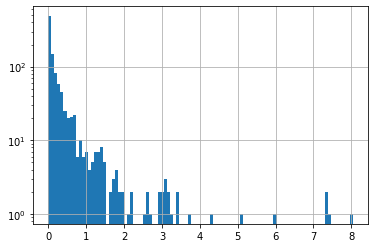

In [31]:
game_df.std(1).hist(bins=100)
plt.yscale('log')

plt.show()

Sales over different platforms can vary a lot - we look at the standard deviation as one measure.  However most are very close to zero, meaning the sales across platforms are close to each other.

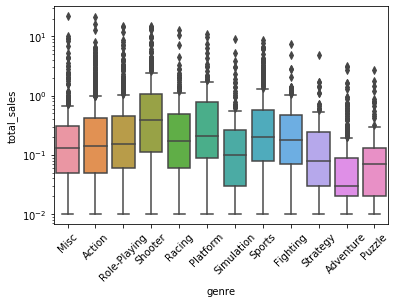

In [32]:
sns.boxplot(data=df, x ='genre', y='total_sales' )
plt.yscale('log')
plt.xticks(rotation=45);

For Genres,Shooter games have the highest averages sales, with Adventure games the lowest.

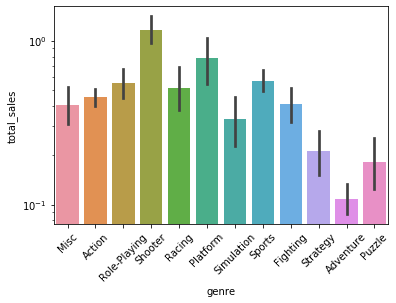

In [33]:
sns.barplot(data=df, x ='genre', y='total_sales' )
plt.yscale('log')
plt.xticks(rotation=45);

After all data preprocessing, first, I ploted number of games released each year to get a sense of how far back we should be looking. There are relatively few games released prior to 2000, with a peak around 2008. In 2017 PS4 will be the most popular platform.

    -Platforms ( 3DS, PC, PS3, PSV, Wii, WiiU, XBOX360) are shrinking in sales for the past few years.
    -PS4 and XOne are shrinking in sales last year.
    -PS4 is the top sales platform in 2016.
    -Most sales platforms are of Wii, X360, PS3, XOne and PS4
    -Critic scores may slighly increase sales of a game, but user scores have no impact. Part of the reason could be people have already bought the game and don't know if they like it or not until after they play it.
        - Platforms ( 3DS, PC, PS3, PSV, PSP, Wii, WiiU, XBOX360, XOne) will be sale in 2017.
    -For Genres,Shooter games have the highest averages sales, with Adventure games the lowest.

##### Regional Differences in Top Platforms

In [34]:
platform_sales = df.groupby('platform')[['na_sales','eu_sales','jp_sales','other_sales','total_sales']].sum()
platform_sales

,na_sales,eu_sales,jp_sales,other_sales,total_sales
platform,,,,,
3DS,82.65,61.27,100.62,13.27,257.81
DS,59.66,28.06,27.90,8.13,123.75
PC,39.07,68.82,0.00,14.07,121.96
PS2,2.32,1.67,0.80,1.30,6.09
PS3,229.25,213.60,59.26,85.63,587.74
PS4,108.74,141.09,15.96,48.35,314.14
PSP,9.65,7.59,42.20,4.61,64.05
PSV,12.47,13.07,21.84,6.43,53.81
Wii,121.20,65.91,17.75,18.11,222.97


In [35]:
platform_sales.na_sales.nlargest(5)

platform
X360    334.18
PS3     229.25
Wii     121.20
PS4     108.74
XOne     93.12
Name: na_sales, dtype: float64

In [36]:
platform_sales.eu_sales.nlargest(5)

platform
PS3     213.60
X360    163.41
PS4     141.09
PC       68.82
Wii      65.91
Name: eu_sales, dtype: float64

In [37]:
platform_sales.jp_sales.nlargest(5)

platform
3DS    100.62
PS3     59.26
PSP     42.20
DS      27.90
PSV     21.84
Name: jp_sales, dtype: float64

The most popular platforms by region :
    
    NA region - X360, 2/3 from total sales;
    EU region - PS3, 1/3 from total sales;
    JP region - 3DS, 2/5 from total sales.


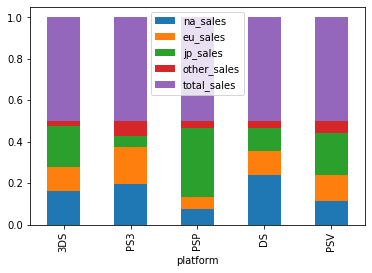

In [38]:
(platform_sales.divide(platform_sales.sum(1),0)).loc[platform_sales.jp_sales.nlargest(5).index].plot(kind='bar', stacked=True)
plt.show()

In [39]:
genre_sales = df.groupby('genre')[['na_sales','eu_sales','jp_sales','other_sales','total_sales']].sum()
genre_sales

,na_sales,eu_sales,jp_sales,other_sales,total_sales
genre,,,,,
Action,290.64,233.63,72.20,76.62,673.09
Adventure,20.84,18.88,15.67,5.61,61.00
Fighting,39.05,20.33,13.90,8.31,81.59
Misc,123.80,66.09,24.29,20.38,234.56
Platform,54.90,38.30,15.81,10.71,119.72
Puzzle,9.10,6.58,3.40,1.52,20.60
Racing,46.11,54.75,6.68,15.14,122.68
Role-Playing,112.05,75.48,103.54,24.21,315.28
Shooter,237.47,171.45,14.04,56.78,479.74


In [40]:
genre_sales.na_sales.nlargest(5)

genre
Action          290.64
Shooter         237.47
Sports          156.81
Misc            123.80
Role-Playing    112.05
Name: na_sales, dtype: float64

In [41]:
genre_sales.eu_sales.nlargest(5)

genre
Action          233.63
Shooter         171.45
Sports          116.84
Role-Playing     75.48
Misc             66.09
Name: eu_sales, dtype: float64

In [42]:
genre_sales.jp_sales.nlargest(5)

genre
Role-Playing    103.54
Action           72.20
Misc             24.29
Platform         15.81
Adventure        15.67
Name: jp_sales, dtype: float64

The most popular genre by region :
NA region - Action, 1/2 from total sales;
EU region - Action, 1/4 from total sales;
JP region - Role-Playing, 1/3 from total sales.


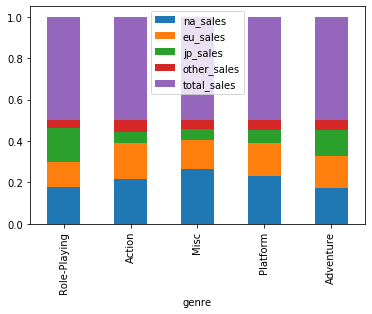

In [43]:
(genre_sales.divide(genre_sales.sum(1),0)).loc[genre_sales.jp_sales.nlargest(5).index].plot(kind='bar', stacked=True)
plt.show()

## Statistical Tests <a name="introduction2"></a>


*Average user ratings of the Xbox One and PC platforms are the same.

H0: average user ratings of the Xbox One = average user ratings of the PC

H1: average user ratings of the Xbox One <> average user ratings of the PC

alpha = 0.05 (pretty standard choice)

In [44]:
np.var(df.user_score)


2.3131670563383415

In [45]:
df.groupby('platform').user_score.describe().loc[['XOne', 'PC']]

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
XOne,182.0,6.521429,1.380941,1.6,5.8,6.8,7.5,9.2
PC,374.0,6.518182,1.565390,1.4,5.6,6.8,7.7,9.3


In [46]:
stats.ttest_ind(df[df.platform=='XOne'].user_score.dropna(), df[df.platform=='PC'].user_score.dropna())

Ttest_indResult(statistic=0.023828344764552412, pvalue=0.980998110649032)

We reject the null hypothesis of equal averages -- there is a significant difference in average user ratings of two platforms.

*Average user ratings for the Action and Sports genres are different.

H0: average user ratings for the Action = average user ratings for the Sports

H1: average user ratings for the Action <> average user ratings for the Sports

alpha = 0.05 (pretty standard choice)



In [47]:
df.groupby('genre').user_score.describe().loc[['Action', 'Sports']]

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Action,779.0,6.781900,1.360201,1.6,6.0,7.1,7.8,9.1
Sports,315.0,5.901587,1.683934,0.2,5.0,6.2,7.2,9.0


In [48]:
df[df.genre=='Action'].user_score.dropna()

16       8.2
23       8.1
42       8.3
81       6.6
118      8.3
        ... 
16597    6.0
16652    8.5
16654    5.1
16660    6.7
16692    7.6
Name: user_score, Length: 779, dtype: float64

In [49]:
stats.ttest_ind(df[df.genre=='Action'].user_score.dropna(), df[df.genre=='Sports'].user_score.dropna())

Ttest_indResult(statistic=9.026177597381961, pvalue=7.839124224330309e-19)

We get a VERY small pvalue (1.53x10-6) -- so with alpha set to 0.01 or 0.05 we reject the null hypothesis -- i.e. the two means are statistically different.  The average user ratings for the Action and Sports genres are not the same.

We fail to reject the null hypothesis of equal averages -- there is a significant difference in in average user ratings of two platforms.

# General conclusion <a name="introduction3"></a>

At first we prepared data:

- replaced the column names (make them lowercase).
- filled null values;
- replaced the real data type with an integer;
- categorixed data.

After all data preprocessing, first, I ploted number of games released each year to get a sense of how far back we should be looking. There are relatively few games released prior to 2000, with a peak around 2008.
In 2017 PS4 will be the most popular platform.

- Platforms ( 3DS, PC, PS3, PSV, Wii, WiiU, XBOX360) are shrinking in sales for the past few years.
- PS4 and XOne are shrinking in sales last year.
- PS4 is the top sales platform in 2016.
- Most sales platforms are of Wii, X360, PS3, XOne and PS4 
- Critic scores may slighly increase sales of a game, but user scores have no impact. Part of the reason could be people have already bought the game and don't know if they like it or not until after they play it.
- For Genres,Shooter games have the highest averages sales, with Adventure games the lowest.
- Platforms ( 3DS, PC, PS3, PSV, PSP, Wii, WiiU, XBOX360, XOne) will be sale in 2017.
- The most popular platforms by region :
NA region - X360, 2/3 from total sales;
EU region - PS3, 1/3 from total sales;
JP region - 3DS, 2/5 from total sales.
- The most popular genre by region :
NA region - Action, 1/2 from total sales;
EU region - Action, 1/4 from total sales;
JP region - Role-Playing, 1/3 from total sales.

And we tested the hypotheses:

    Average user ratings of the Xbox One and PC platforms are the same.
    Result: We reject the null hypothesis of equal averages
    
    Average user ratings for the Action and Sports genres are different.
    Result: We fail to reject the null hypothesis of equal averages.
    
I recomend for the next year:
- Buy more games for PS4;
- Buy more game Shooter genre and less Adventure gerne.